<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

Library,Version
OS,nt [win32]
Python,"3.10.0 (tags/v3.10.0:b494f59, Oct 4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]"
IPython,7.30.1
MatPlotLib,3.5.0
Numpy,1.21.4
pyAgrum,0.22.4.9


# Credal Net from BN

In [3]:
bn=gum.fastBN("A->B[3]->C<-D<-A->E->F")
bn_min=gum.BayesNet(bn)
bn_max=gum.BayesNet(bn)
for n in bn.nodes():
  x=0.4*min(bn.cpt(n).min(),1-bn.cpt(n).max())
  bn_min.cpt(n).translate(-x)
  bn_max.cpt(n).translate(x)
    
cn=gum.CredalNet(bn_min,bn_max)
cn.intervalToCredal()

gnb.sideBySide(bn.cpt("B"),bn_min.cpt("B"),bn_max.cpt("B"))
cn

(pyAgrum.CredalNet<double>@00000261EC404530) 
A:Range([0,1])
<> : [[0.0726916 , 0.927308] , [0.169617 , 0.830383]]

B:Range([0,2])
<A:0> : [[0.289377 , 0.648771 , 0.0618519] , [0.289377 , 0.666441 , 0.0441816] , [0.307051 , 0.666441 , 0.0265082] , [0.324721 , 0.64877 , 0.0265082] , [0.307051 , 0.631098 , 0.0618519] , [0.324721 , 0.631098 , 0.0441811]]
<A:1> : [[0.306865 , 0.277135 , 0.416] , [0.306865 , 0.294807 , 0.398327] , [0.324537 , 0.294807 , 0.380655] , [0.34221 , 0.277134 , 0.380655] , [0.324537 , 0.259463 , 0.416] , [0.34221 , 0.259463 , 0.398327]]

C:Range([0,1])
<B:0|D:0> : [[0.437731 , 0.562269] , [0.556245 , 0.443755]]
<B:1|D:0> : [[0.487663 , 0.512337] , [0.606175 , 0.393825]]
<B:2|D:0> : [[0.420213 , 0.579787] , [0.538726 , 0.461274]]
<B:0|D:1> : [[0.792601 , 0.207399] , [0.911116 , 0.0888844]]
<B:1|D:1> : [[0.286619 , 0.713381] , [0.405134 , 0.594866]]
<B:2|D:1> : [[0.421257 , 0.578743] , [0.53977 , 0.46023]]

D:Range([0,1])
<A:0> : [[0.51816 , 0.48184] , [0.726138 , 0.273862]]
<A:1> : [[0.636038 , 0.363962] , [0.844017 , 0.155983]]

E:Range([0,1])
<A:0> : [[0.325488 , 0.674512] , [0.571991 , 0.428009]]
<A:1> : [[0.184877 , 0.815123] , [0.43138 , 0.56862]]

F:Range([0,1])
<E:0> : [[0.492652 , 0.507348] , [0.73999 , 0.26001]]
<E:1> : [[0.185504 , 0.814496] , [0.432844 , 0.567156]]

#### We can use LBP on CN (L2U) only for binary credal networks (here B is not binary). We then propose the classical binarization (but warn the user that this leads to approximation in the inference)

In [4]:
cn2=gum.CredalNet(bn_min,bn_max)
cn2.intervalToCredal()
cn2.approximatedBinarization()
cn2.computeBinaryCPTMinMax()

gnb.sideBySide(cn,cn2)

Here, $B$ becomes 
- $B$-b$i$ : the $i$-th bit of B
- instrumental $B$-v$k$ : the indicator variable for each modality $k$ of $B$

In [5]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie2_lbp=gum.CNLoopyPropagation(cn2)
ie2_mc=gum.CNMonteCarloSampling(cn2)

In [6]:
gnb.sideBySide(gnb.getInference(cn,engine=ie_mc),
               gnb.getInference(cn2,engine=ie2_mc),
               gnb.getInference(cn2,engine=ie2_lbp))

In [7]:
gnb.sideBySide(ie_mc.CN(),ie_mc.marginalMin("F"),ie_mc.marginalMax("F"))
gnb.sideBySide(ie_mc.CN(),ie2_lbp.marginalMin("F"),ie2_lbp.marginalMax("F"))
print(cn)


A:Range([0,1])
<> : [[0.0726916 , 0.927308] , [0.169617 , 0.830383]]

B:Range([0,2])
<A:0> : [[0.289377 , 0.648771 , 0.0618519] , [0.289377 , 0.666441 , 0.0441816] , [0.307051 , 0.666441 , 0.0265082] , [0.324721 , 0.64877 , 0.0265082] , [0.307051 , 0.631098 , 0.0618519] , [0.324721 , 0.631098 , 0.0441811]]
<A:1> : [[0.306865 , 0.277135 , 0.416] , [0.306865 , 0.294807 , 0.398327] , [0.324537 , 0.294807 , 0.380655] , [0.34221 , 0.277134 , 0.380655] , [0.324537 , 0.259463 , 0.416] , [0.34221 , 0.259463 , 0.398327]]

C:Range([0,1])
<B:0|D:0> : [[0.437731 , 0.562269] , [0.556245 , 0.443755]]
<B:1|D:0> : [[0.487663 , 0.512337] , [0.606175 , 0.393825]]
<B:2|D:0> : [[0.420213 , 0.579787] , [0.538726 , 0.461274]]
<B:0|D:1> : [[0.792601 , 0.207399] , [0.911116 , 0.0888844]]
<B:1|D:1> : [[0.286619 , 0.713381] , [0.405134 , 0.594866]]
<B:2|D:1> : [[0.421257 , 0.578743] , [0.53977 , 0.46023]]

D:Range([0,1])
<A:0> : [[0.51816 , 0.48184] , [0.726138 , 0.273862]]
<A:1> : [[0.636038 , 0.363962] , [0.

## Credal Net from bif files

In [8]:
cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

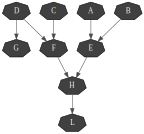

In [9]:
gnb.showCN(cn,"2")

In [10]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertEvidenceFile("res/cn/L2U.evi")

In [11]:
ie.setRepetitiveInd(False)
ie.setMaxTime(1)
ie.setMaxIter(1000)

ie.makeInference()

In [12]:
gnb.sideBySide(cn,gnb.getInference(cn,targets={"A","H","L","D"},engine=ie,evs={"L":[0,1],"G":[1,0]}))

# Comparing inference in credal networks

In [13]:
import pyAgrum as gum

def showDiffInference(model,mc,lbp):
    for i in model.current_bn().nodes():
        a,b=mc.marginalMin(i)[:]
        c,d=mc.marginalMax(i)[:]
        
        e,f=lbp.marginalMin(i)[:]
        g,h=lbp.marginalMax(i)[:]
        
        plt.scatter([a,b,c,d],[e,f,g,h])
        

cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

#### The two inference give quite the same result

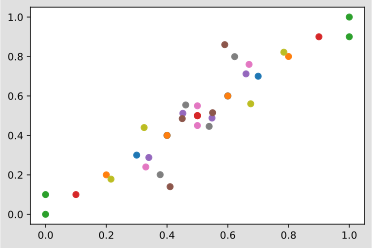

In [14]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.makeInference()

cn.computeBinaryCPTMinMax()
ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)

#### but not when evidence are inserted

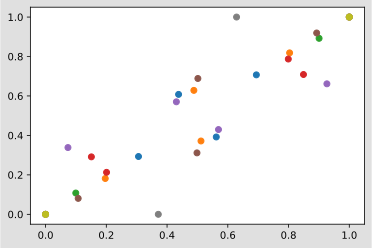

In [15]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.insertEvidenceFile("res/cn/L2U.evi")
ie_mc.makeInference()

ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.insertEvidenceFile("res/cn/L2U.evi")
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)


## Dynamical Credal Net

In [16]:
cn=gum.CredalNet("res/cn/bn_c_8.bif","res/cn/den_c_8.bif")
cn.bnToCredal(0.8,False)

In [17]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(True)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()

In [18]:
print(ie.dynamicExpMax("temp"))

(13.796595325898947, 11.391276171798012, 11.880707481299204, 11.845957195973266, 11.832343590421114, 11.838440247998115, 11.837182337197266, 11.83727595089036, 11.837309606952806)


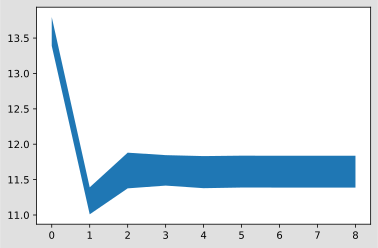

In [19]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

In [20]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()


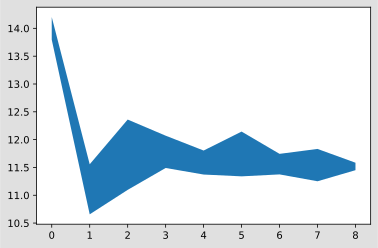

In [21]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

stopped with epsilon=0


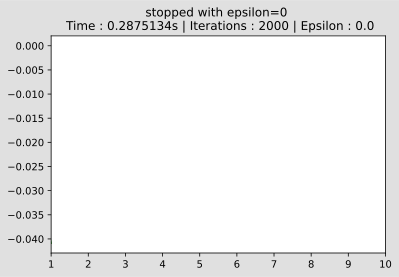

In [22]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(5000)

gnb.animApproximationScheme(ie)
ie.makeInference()
print(ie.messageApproximationScheme())

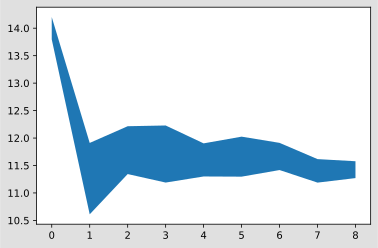

In [23]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"));